# Exploratory Analysis

In [1]:
# Essential imports and constants
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()
import requests, time, datetime, re

# if executed locally
TEST = 'Rationale/test.csv'
TICKER = 'Metadata/ticker.txt'
FORM4_LINK = 'Database/form4_data.csv'
FORM4_LINK_XML = 'Database/form4_data_xml.csv'
FORM4_LINK_HTM = 'Database/form4_data_htm.csv'
FORM4_LINK_TXT = 'Database/form4_data_txt.csv'
FORM4_DETAIL = 'Database/form4_detail.csv' 
FORM4_DETAIL_XML = 'Database/form4_detail_xml.csv'
FORM4_DETAIL_HTM = 'Database/form4_detail_htm.csv'
FORM4_DETAIL_TXT = 'Database/form4_detail_txt.csv'
FORM4_TX = 'Database/form4_tx.csv'
FORM4_TX_XML = 'Database/form4_tx_xml.csv'
FORM4_TX_HTM = 'Database/form4_tx_htm.csv'
FORM4_TX_TXT = 'Database/form4_tx_txt.csv'
META_DJ30 = 'Metadata/ticker_dj30.txt' 
META_SP500 = 'Metadata/ticker_sp500.txt'
META_SP500_RAN = 'Metadata/ticker_sp500_ran.txt'
CODE_EXTRACT = 'DataProcessingPipelining/extract_file.sh'
CODE_EXTRACT_ONE = 'DataProcessingPipelining/extract_1_quarter.sh'
CODE_EXTRACT_NOPAR = 'DataProcessingPipelining/extract_noPAR.sh'

In [ ]:
# if executed on Google Colab
from google.colab import drive
drive.mount('/content/drive')

BASE_DRIVE_LINK = '/content/drive/My Drive/URECA/'
FORM4_LINK = BASE_DRIVE_LINK + 'Database/form4_data.csv'
FORM4_LINK_XML = BASE_DRIVE_LINK + 'Database/form4_data_xml.csv'
FORM4_LINK_HTM = BASE_DRIVE_LINK + 'Database/form4_data_htm.csv'
FORM4_LINK_TXT = BASE_DRIVE_LINK + 'Database/form4_data_txt.csv'
FORM4_DETAIL = BASE_DRIVE_LINK + 'Database/form4_detail.csv'
FORM4_DETAIL_XML = BASE_DRIVE_LINK + 'Database/form4_detail_xml.csv'
FORM4_DETAIL_HTM = BASE_DRIVE_LINK + 'Database/form4_detail_htm.csv'
FORM4_DETAIL_TXT = BASE_DRIVE_LINK + 'Database/form4_detail_txt.csv'
FORM4_TX = BASE_DRIVE_LINK + 'Database/form4_tx.csv'
FORM4_TX_XML = BASE_DRIVE_LINK + 'Database/form4_tx_xml.csv'
FORM4_TX_HTM = BASE_DRIVE_LINK + 'Database/form4_tx_htm.csv'
FORM4_TX_TXT = BASE_DRIVE_LINK + 'Database/form4_tx_txt.csv'
META_DJ30 = BASE_DRIVE_LINK + 'Metadata/ticker_dj30.txt' 
META_SP500 = BASE_DRIVE_LINK + 'Metadata/ticker_sp500.txt'
META_SP500_RAN = BASE_DRIVE_LINK + 'Metadata/ticker_sp500_ran.txt'
TEST = BASE_DRIVE_LINK + 'Rationale/test.csv'
TICKER = BASE_DRIVE_LINK + 'Metadata/ticker.txt'
CODE_EXTRACT = BASE_DRIVE_LINK + 'DataProcessingPipelining/extract_file.sh'
CODE_EXTRACT_ONE = BASE_DRIVE_LINK + 'DataProcessingPipelining/extract_1_quarter.sh'
CODE_EXTRACT_NOPAR = BASE_DRIVE_LINK + 'DataProcessingPipelining/extract_noPAR.sh'

In [2]:
detail_data = pd.read_csv(FORM4_DETAIL_XML, sep='|', parse_dates = ['Date'], index_col = 'Date')
tx_data = pd.read_csv(FORM4_TX_XML, sep = '|', parse_dates = ['date'], index_col = 'date')
display(detail_data.head())
display(tx_data.head())

,Company,CIK,Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,reporter_title,is_director,is_officer,is_beneficial_owner,is_other
Date,,,,,,,,,,,,,
2003-07-25,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000036,4.0,Grenz M Kay,1196474.0,SENIOR VICE PRESIDENT HR,0.0,1.0,0.0,0.0
2003-07-11,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000031,4.0,Palensky Fred J,1197743.0,EXEC VP SFTY SEC & PROT SVCS,0.0,1.0,0.0,0.0
2003-07-25,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000037,4.0,Mcnerney W James Jr,1182055.0,CHAIRMAN OF THE BOARD & CEO,1.0,1.0,0.0,0.0
2003-07-25,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000038,4.0,Nozari M S,1197740.0,EXEC VP CONSUMER &,0.0,1.0,0.0,0.0
2003-07-11,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000030,4.0,Belschner Ronald R,1196469.0,SENIOR VICE PRESIDENT ENGRG,0.0,1.0,0.0,0.0


,accession_no,CIK,stock_type,code,acquired,shares_exchanged,net_shares_owned,stock_price,direct_ownership
date,,,,,,,,,
2003-08-06,6674003000048,66740,Common Stock,M,A,1052.0,1052.0,95.000,D
2003-08-06,6674003000049,66740,Common Stock,M,A,2560.0,15175.0,63.035,D
2003-08-06,6674003000049,66740,Common Stock,F,D,1163.0,14012.0,138.660,D
2003-08-06,6674003000049,66740,Common Stock,F,D,456.0,13556.0,138.660,D
2003-08-06,6674003000049,66740,Common Stock,M,A,1118.0,14674.0,90.150,D


# Cleaning and Inspecting Data
Inspection of missing values is performed as some Form 4 files are not filled in appropriately and completely.
## Detail Data Source
Inspect the missing values: 

In [89]:
detail_data.isnull().sum(axis = 0)

Company                    0
CIK                        0
Link                       0
trad_symbol                7
accession_no               0
form                       0
reporter_name              0
reporter_cik               0
reporter_title         67837
is_director            23976
is_officer             17677
is_beneficial_owner    41274
is_other               41382
dtype: int64

Cleaning operations
1. [Trim strings](https://stackoverflow.com/questions/5197959/how-do-i-remove-hex-values-in-a-python-string-with-regular-expressions): when data are scraped, some company names have trailing backspaces '\x08', which may cause duplication of companies. This process removes the backspaces
2. Filling role codes: for `is_director`, `is_officer` and two other role codes, there are many null values. This research assumes that null values indicate that the reporter does not have the role

In [3]:
# Trim the company names
def trim_company(record):
    record['Company'] = re.sub(r'[^\w\s]*', '', record['Company'])
    return record

In [4]:
detail_data = detail_data.apply(trim_company, axis = 1);

### Trading symbols

In [92]:
detail_data.loc[detail_data['trad_symbol'].isnull(), ['Company', 'CIK']].drop_duplicates()

,Company,CIK
Date,,
2014-01-02,BlackRock Inc,1364742


BlackRock, the investment company with CIK 1364742, has trading symbol 'BLK'. Add the trading symbol to it

In [5]:
detail_data.loc[detail_data['trad_symbol'].isnull(), 'trad_symbol'] = 'BLK'

### Role codes

In [6]:
role_codes = ['is_director', 'is_officer', 'is_beneficial_owner', 'is_other']
detail_data[role_codes] = detail_data.loc[:,role_codes].fillna(0)

In [7]:
detail_data.isnull().sum(axis = 0)

Company                    0
CIK                        0
Link                       0
trad_symbol                0
accession_no               0
form                       0
reporter_name              0
reporter_cik               0
reporter_title         67837
is_director                0
is_officer                 0
is_beneficial_owner        0
is_other                   0
dtype: int64

### Standardising Column Data Types and Sort

In [7]:
detail_data = detail_data.astype({'form': int, 'reporter_cik': int, 'is_director': bool, 'is_officer': bool, 
                           'is_beneficial_owner': bool, 'is_other': bool})
detail_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174386 entries, 2003-07-25 to 2016-01-13
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Company              174386 non-null  object
 1   CIK                  174386 non-null  int64 
 2   Link                 174386 non-null  object
 3   trad_symbol          174386 non-null  object
 4   accession_no         174386 non-null  int64 
 5   form                 174386 non-null  int32 
 6   reporter_name        174386 non-null  object
 7   reporter_cik         174386 non-null  int32 
 8   reporter_title       106549 non-null  object
 9   is_director          174386 non-null  bool  
 10  is_officer           174386 non-null  bool  
 11  is_beneficial_owner  174386 non-null  bool  
 12  is_other             174386 non-null  bool  
dtypes: bool(4), int32(2), int64(2), object(5)
memory usage: 12.6+ MB


In [49]:
detail_data = detail_data.sort_index()

## Transaction Data Source
Inspect the missing values

In [107]:
print(len(tx_data))
tx_data.isnull().sum(axis = 0)

380716


accession_no           0
CIK                    0
stock_type             0
code                   0
acquired               0
shares_exchanged       0
net_shares_owned      14
stock_price         8557
direct_ownership       0
dtype: int64

Two fields have missing values:
1. 'net_shares_owned': it depends on the reporter's revelation. Although the missing values might be recovered by tracing back the dates, the process would be over-complicated just to recover 14 missing values
2. 'stock_price': stock price depends on the exact time the reporter trades. Hence, such missing values are allowed.  

The proportions of missing values for both attributes are less than 2% of the overall data. Hence, cleaning of these two columns is ignored 

### Standardising Column Data Types

In [19]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380716 entries, 2003-08-06 to 2005-11-01
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accession_no      380716 non-null  int64  
 1   CIK               380716 non-null  int64  
 2   stock_type        380716 non-null  object 
 3   code              380716 non-null  object 
 4   acquired          380716 non-null  object 
 5   shares_exchanged  380716 non-null  float64
 6   net_shares_owned  380702 non-null  float64
 7   stock_price       372159 non-null  float64
 8   direct_ownership  380716 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 29.0+ MB


In [50]:
tx_data = tx_data.sort_index()

## Exploring Data

### Summary Statistics
1. There are more officers than directors.
2. Officers and directors are many more than beneficial owners and insiders other than officers, directors and beneficial owners. This observation is also shown in the number of transactions made by role codes

In [8]:
insiders = detail_data['reporter_cik'].nunique()
companies = detail_data['CIK'].nunique()
print(f"Insiders: {insiders}")
print(f"Companies: {companies}")
print(f"Insiders per Companies: {round(insiders/companies)}")
print(f"Transactions: {len(tx_data)}")
tx = tx_data['acquired'].value_counts()
tx.index = ['Sale transactions:', 'Purchase transactions:']
print(tx)

Insiders: 6946
Companies: 158
Insiders per Companies: 44
Transactions: 380716
Sale transactions:        252687
Purchase transactions:    128029
Name: acquired, dtype: int64


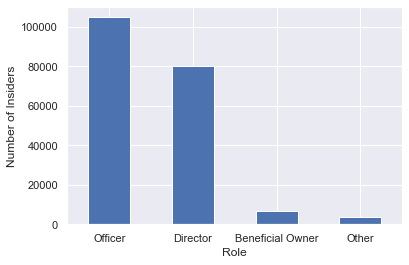

In [15]:
f, axes = plt.subplots(1, figsize = (6, 4))

ax = detail_data[['is_director', 'is_officer', 'is_beneficial_owner', 'is_other']].sum().sort_values(ascending=False).plot.bar(rot=0)
ax.set_xlabel("Role")
ax.set_ylabel("Number of Insiders")
ax.set_xticklabels(["Officer", "Director", "Beneficial Owner", "Other"]);


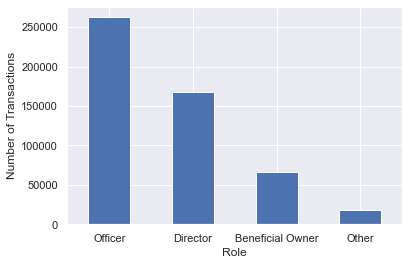

In [81]:
transaction_data = detail_data.merge(tx_data, on='accession_no')
ax = transaction_data[['is_director', 'is_officer', 'is_beneficial_owner', 'is_other']].sum().sort_values(ascending=False).plot.bar(rot=0)
ax.set_xlabel("Role")
ax.set_ylabel("Number of Transactions")
ax.set_xticklabels(["Officer", "Director", "Beneficial Owner", "Other"]);

### Distribution of Number of Companies Having a Number of Insiders
Although only 150 S&P 500 companies are shown, the trend is similar to the benchmark. Fewer companies have more insiders. From the graph below, typically only one company has many insiders (from 20 to 100 insiders)

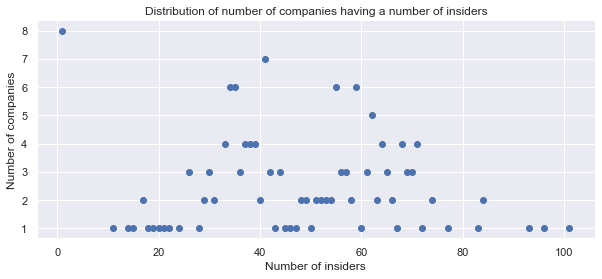

In [13]:
tx_group = detail_data.groupby(['CIK'])['reporter_cik'].nunique()
tx_distribution = tx_group.groupby(tx_group).count()
fig = plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.scatter(tx_distribution.index, tx_distribution.values, marker='o')
ax.set_xlabel('Number of insiders')
ax.set_ylabel('Number of companies')
ax.set_title('Distribution of number of companies having a number of insiders')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Time Series by Role Codes
Monthly visualisation is shown.
1. Beneficial owners indeed have different behaviours than company insiders.. There is a spike after June 2008 (economic crisis), but the number of transactions remains low all the while compared to officers.
2. More officers' transactions than directors' transactions. This is aligned with the paper's explanation that there are more officers than directors

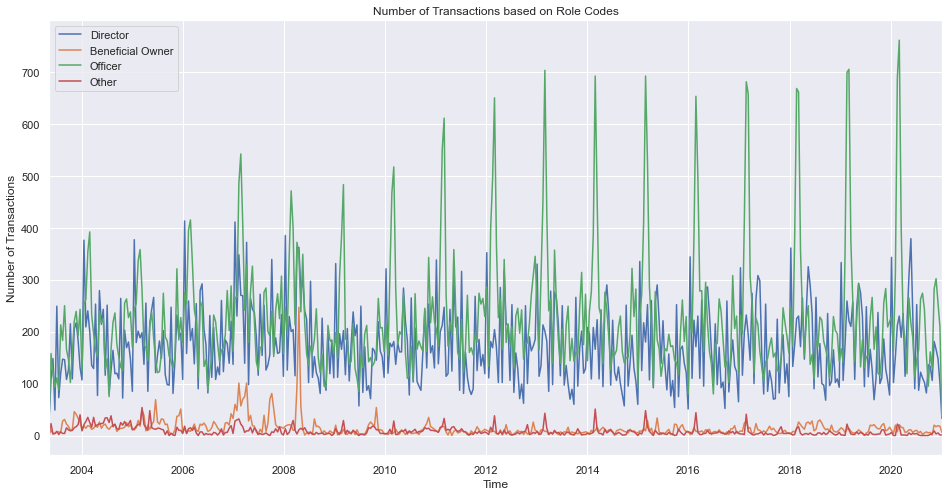

In [17]:
f, axes = plt.subplots(figsize = (16, 8))
df_role = detail_data[['is_director', 'is_beneficial_owner', 'is_officer', 'is_other']]
df_role.resample('2W').sum().plot(ax = axes)
plt.title("Number of Transactions based on Role Codes")
plt.ylabel("Number of Transactions")
plt.xlabel("Time")
plt.legend(['Director', 'Beneficial Owner', 'Officer', 'Other']);